In [351]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
import os
os.environ['OMP_NUM_THREADS'] = '2' #wird gebraucht um keine Warnung von Windows zu bekommen 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [352]:
train_data = pd.read_csv('./mymoviedb.csv', engine='python')
netflix_data = pd.read_csv('./netflix_titles.csv', engine='python')
disney_data = pd.read_csv('./disney_plus_titles.csv', engine='python')
amazon_data = pd.read_csv('./amazon_prime_titles.csv', engine='python')

In [353]:
column_types = {'Title':'string', 'Overview':'string', 'Original_Language':'string', 'Genre':'string'}

train_data_clean = pd.read_csv('./mymoviedb.csv', engine='python', dtype=column_types)

In [354]:
train_data_clean = train_data_clean.dropna()
train_data_clean['Vote_Count'] = train_data_clean['Vote_Count'].astype(int)
train_data_clean['Popularity'] = train_data_clean['Popularity'].astype(int)
train_data_clean['Vote_Average'] = train_data_clean['Vote_Average'].astype(float)
train_data_clean['Release_Date'] = pd.to_datetime(train_data_clean['Release_Date'])

In [355]:
train_data_clean = train_data_clean.drop(columns=['Poster_Url','Overview'])

In [356]:
column_types_netflix = {'title':'string','cast':'string','type':'string','listed_in':'string'}
data_netflix_clean = pd.read_csv('./netflix_titles.csv', engine='python', dtype=column_types_netflix)
data_netflix_clean = data_netflix_clean.drop(columns=['description', 'date_added', 'duration', 'country', 'show_id', 'director', 'rating'])
data_netflix_clean = data_netflix_clean.dropna()
data_netflix_clean['release_year'] = pd.to_datetime(data_netflix_clean['release_year'], format='%Y')
data_netflix_clean = data_netflix_clean[data_netflix_clean['type'] != 'TV Show']

In [357]:
netflix_common_titles = pd.merge(data_netflix_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
netflix_common_titles = netflix_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

In [358]:
column_types_disney = {'title':'string', 'type':'string', 'cast':'string' , 'listed_in':'string'}
disney_data_clean = pd.read_csv('./disney_plus_titles.csv', engine='python', dtype=column_types_disney)
disney_data_clean = disney_data_clean.drop(columns=['show_id', 'director', 'country', 'duration', 'description', 'date_added' , 'rating'])
disney_data_clean = disney_data_clean.dropna()
disney_data_clean['release_year'] = pd.to_datetime(disney_data_clean['release_year'], format = '%Y')
disney_data_clean = disney_data_clean[disney_data_clean['type'] != 'TV Show']

In [359]:
disney_common_titles = pd.merge(disney_data_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
disney_common_titles = disney_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

In [360]:
column_types_amazon = {'title':'string', 'type':'string', 'cast':'string' , 'listed_in':'string'}

amazon_data_clean = pd.read_csv('./amazon_prime_titles.csv', engine='python', dtype=column_types_amazon)
amazon_data_clean = amazon_data_clean.drop(columns=['show_id', 'director', 'country', 'duration', 'description', 'date_added' , 'rating'])
amazon_data_clean = amazon_data_clean.dropna()
amazon_data_clean['release_year'] = pd.to_datetime(amazon_data_clean['release_year'], format = '%Y')
amazon_data_clean = amazon_data_clean[amazon_data_clean['type'] != 'TV Show']

In [361]:
amazon_common_titles = pd.merge(amazon_data_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
amazon_common_titles = amazon_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

In [362]:
def scale_clustering(data, feature):
    # Select the feature for scaling
    data_for_scaling = data[[feature]]

    # Use StandardScaler to scale the feature
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_scaling)

    return scaled_data

In [363]:
def elbow_function(data, feature):
    wcss = []  # Within-Cluster-Sum-of-Squares
    scaled_data = scale_clustering(data, feature)

    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
    plt.show()

In [364]:
def clustering(data,optimal_clusters):
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    data['Cluster'] = kmeans.fit_predict(scale_clustering(data,'Popularity'))

C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

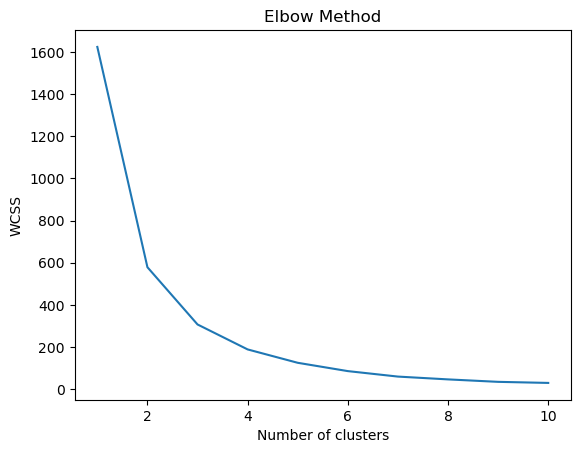

In [365]:
elbow_function(netflix_common_titles, 'Popularity')

C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

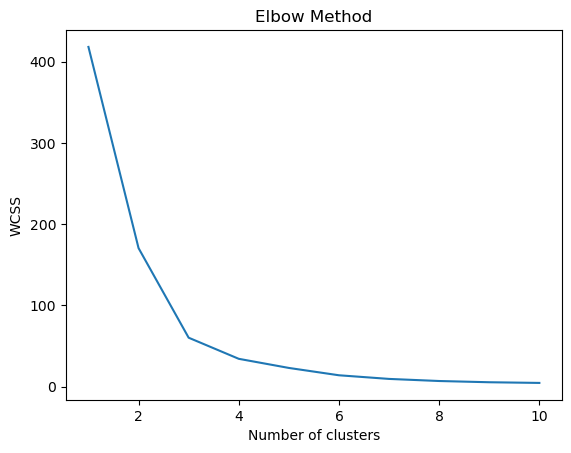

In [366]:
elbow_function(disney_common_titles, 'Popularity')

C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

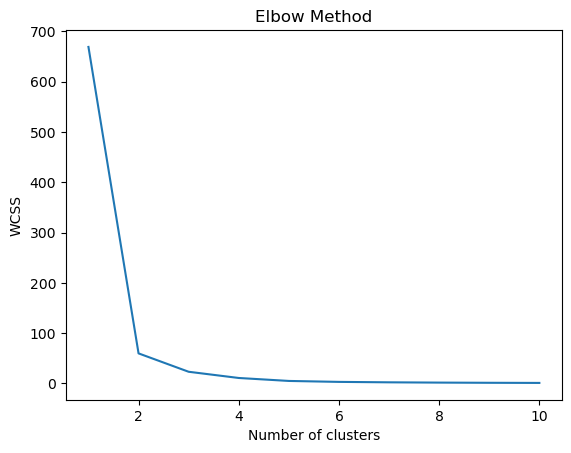

In [367]:
elbow_function(amazon_common_titles, 'Popularity')

In [368]:
clustering(netflix_common_titles,3)
clustering(disney_common_titles,3)
clustering(amazon_common_titles,2)

C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tomfr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [369]:
netflix_common_titles.head()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Cluster
0,My Little Pony: A New Generation,Movie,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-01-01,Children & Family Movies,137,190,8.1,en,"Animation, Family, Fantasy, Comedy, Music, Adv...",1
1,The Starling,Movie,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-01-01,"Comedies, Dramas",27,174,7.2,en,Drama,0
2,Confessions of an Invisible Girl,Movie,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",2021-01-01,"Children & Family Movies, Comedies",62,144,7.0,pt,"Comedy, Drama",2
3,Intrusion,Movie,"Freida Pinto, Logan Marshall-Green, Robert Joh...",2021-01-01,Thrillers,60,412,6.1,en,Thriller,2
4,Go! Go! Cory Carson: Chrissy Takes the Wheel,Movie,"Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",2021-01-01,Children & Family Movies,57,18,5.8,en,"Animation, Family",2


In [370]:
netflix_common_titles['Cluster'].unique()

array([1, 0, 2])

In [371]:
def voting_popularity(data,num_cluster):
    cluster_dataframes = {}
    for i in range(0,num_cluster):
        dataframe= data[data['Cluster']==i]
        cluster_dataframes[i]=dataframe
        i=i+1
    for i in range(0,num_cluster):
        normalized = (cluster_dataframes[i]['Popularity']/cluster_dataframes[i]['Popularity'].max())*10
        combined_rating = (normalized + cluster_dataframes[i]['Vote_Average'])/2
        cluster_dataframes[i] = cluster_dataframes[i].assign(Voting_Popularity=combined_rating)
        i= i+1
    combined_dataframe = pd.concat(cluster_dataframes.values(), ignore_index=True)
    combined_dataframe = combined_dataframe.sort_values(by='Voting_Popularity', ascending=False)
    return combined_dataframe

In [372]:
combined_dataframe_netflix = voting_popularity(netflix_common_titles,3)

In [373]:
combined_dataframe_disney = voting_popularity(disney_common_titles,3)

In [374]:
combined_dataframe_amazon = voting_popularity(amazon_common_titles,2)

posx and posy should be finite values
posx and posy should be finite values


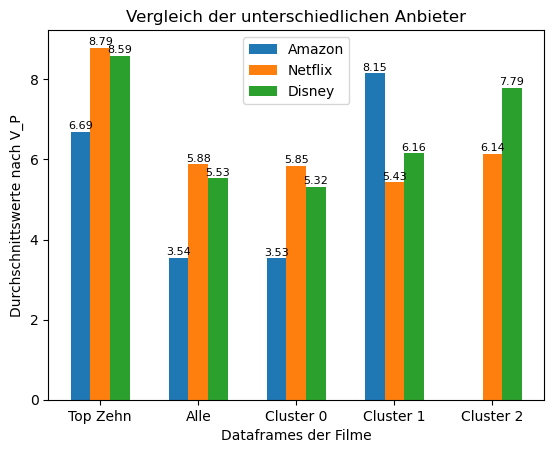

In [379]:
#Data Preperation
top_ten_netflix = combined_dataframe_netflix.head(10)
top_ten_disney = combined_dataframe_disney.head(10)
top_ten_amazon = combined_dataframe_amazon.head(10)

netflix_cluster_0 = combined_dataframe_netflix[combined_dataframe_netflix['Cluster']==0]
netflix_cluster_1 = combined_dataframe_netflix[combined_dataframe_netflix['Cluster']==1]
netflix_cluster_2 = combined_dataframe_netflix[combined_dataframe_netflix['Cluster']==2]

disney_cluster_0 = combined_dataframe_disney[combined_dataframe_disney['Cluster']==0]
disney_cluster_1 = combined_dataframe_disney[combined_dataframe_disney['Cluster']==1]
disney_cluster_2 = combined_dataframe_disney[combined_dataframe_disney['Cluster']==2]

amazon_cluster_0 = combined_dataframe_amazon[combined_dataframe_amazon['Cluster']==0]
amazon_cluster_1 = combined_dataframe_amazon[combined_dataframe_amazon['Cluster']==1]
amazon_cluster_2 = combined_dataframe_amazon[combined_dataframe_amazon['Cluster']==2]


# Example data
labels = ['Top Zehn', 'Alle', 'Cluster 0','Cluster 1', 'Cluster 2']
amazon_values = [top_ten_amazon["Voting_Popularity"].mean(), combined_dataframe_amazon['Voting_Popularity'].mean(), amazon_cluster_0['Voting_Popularity'].mean(), amazon_cluster_1['Voting_Popularity'].mean(), amazon_cluster_2['Voting_Popularity'].mean()]
netflix_values = [top_ten_netflix["Voting_Popularity"].mean(), combined_dataframe_netflix['Voting_Popularity'].mean(), netflix_cluster_0['Voting_Popularity'].mean(), netflix_cluster_1['Voting_Popularity'].mean(), netflix_cluster_2['Voting_Popularity'].mean()]
disney_values = [top_ten_disney["Voting_Popularity"].mean(), combined_dataframe_disney['Voting_Popularity'].mean(), disney_cluster_0['Voting_Popularity'].mean(), disney_cluster_1['Voting_Popularity'].mean(), disney_cluster_2['Voting_Popularity'].mean()]

bar_width = 0.2  # Width of each bar

# Set up the positions for the bars
positions_1 = np.arange(len(labels))
positions_2 = positions_1 + bar_width
positions_3 = positions_1 + 2 * bar_width

# Create the bar chart
plt.bar(positions_1, amazon_values, width=bar_width, label='Amazon')
plt.bar(positions_2, netflix_values, width=bar_width, label='Netflix')
plt.bar(positions_3, disney_values, width=bar_width, label='Disney')

# Add labels and title
plt.xlabel('Dataframes der Filme')
plt.ylabel('Durchschnittswerte nach V_P')
plt.title('Vergleich der unterschiedlichen Anbieter')
plt.xticks(positions_1 + bar_width, labels)

for i in range(len(positions_1)):
    plt.text(positions_1[i], amazon_values[i] + 0.02, f'{amazon_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(positions_2[i], netflix_values[i] + 0.02, f'{netflix_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(positions_3[i], disney_values[i] + 0.02, f'{disney_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [387]:
combined_dataframe_netflix.head()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Cluster,Voting_Popularity
1608,The Lord of the Rings: The Two Towers,Movie,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...",2002-01-01,"Action & Adventure, Sci-Fi & Fantasy",108,17817,8.4,en,"Adventure, Fantasy, Action",2,9.021429
774,American History X,Movie,"Edward Norton, Edward Furlong, Beverly D'Angel...",1998-01-01,Dramas,40,9399,8.4,en,Drama,0,8.961905
964,Indiana Jones and the Last Crusade,Movie,"Harrison Ford, Sean Connery, Denholm Elliott, ...",1989-01-01,"Action & Adventure, Children & Family Movies, ...",42,7987,7.8,en,"Adventure, Action",0,8.900000
1368,The Loud House Movie,Movie,"Asher Bishop, David Tennant, Michelle Gomez, J...",2021-01-01,"Children & Family Movies, Comedies, Music & Mu...",112,109,7.8,en,"Animation, Family, Comedy, Music, Fantasy",2,8.900000
491,The Garden of Words,Movie,"Miyu Irino, Kana Hanazawa, Fumi Hirano, Takesh...",2013-01-01,"Anime Features, International Movies, Romantic...",42,1525,7.6,ja,"Animation, Drama, Romance",0,8.800000


In [424]:
def chart_genre(data,name):
    genres = ['Adventure', 'Fantasy', 'Animation', 'Action', 'Science Fiction', 'Family', 'Crime', 'Thriller', 'Mystery',
          'Horror', 'Comedy', 'Western', 'War', 'Music', 'Romance', 'Drama', 'TV Movie', 'Documentary', 'History']

    values = []

    for genre in genres:
        genre_mean = data.loc[data['Genre'].str.contains(genre), 'Voting_Popularity'].mean()
        values.append(genre_mean)
    
    # Bar-Chart
    plt.figure(figsize=(10, 8))
    sns.barplot(x=values, y=genres, palette='viridis')
    plt.xlabel('Durchschnittliche Beliebtheit')
    plt.ylabel('Genres')
    plt.title('Durchschnittliche Beliebtheit nach Genre auf ' + name)
    plt.show()

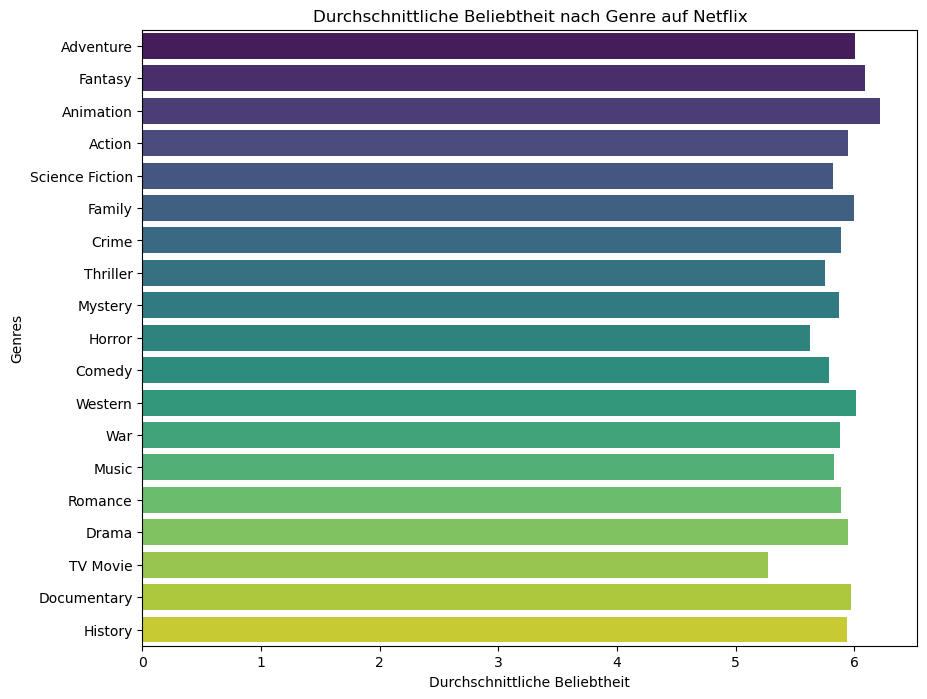

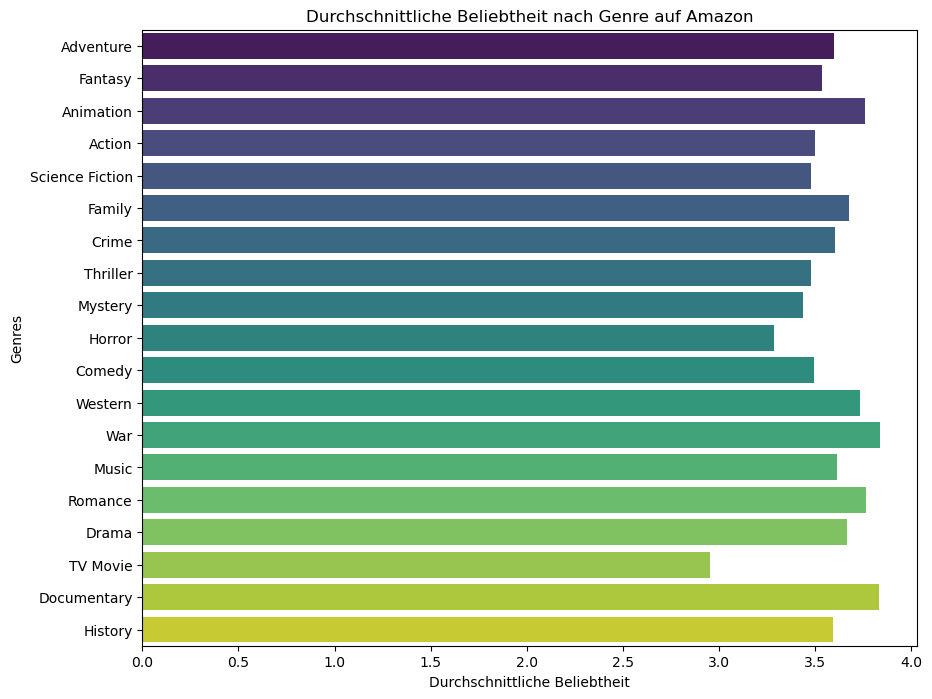

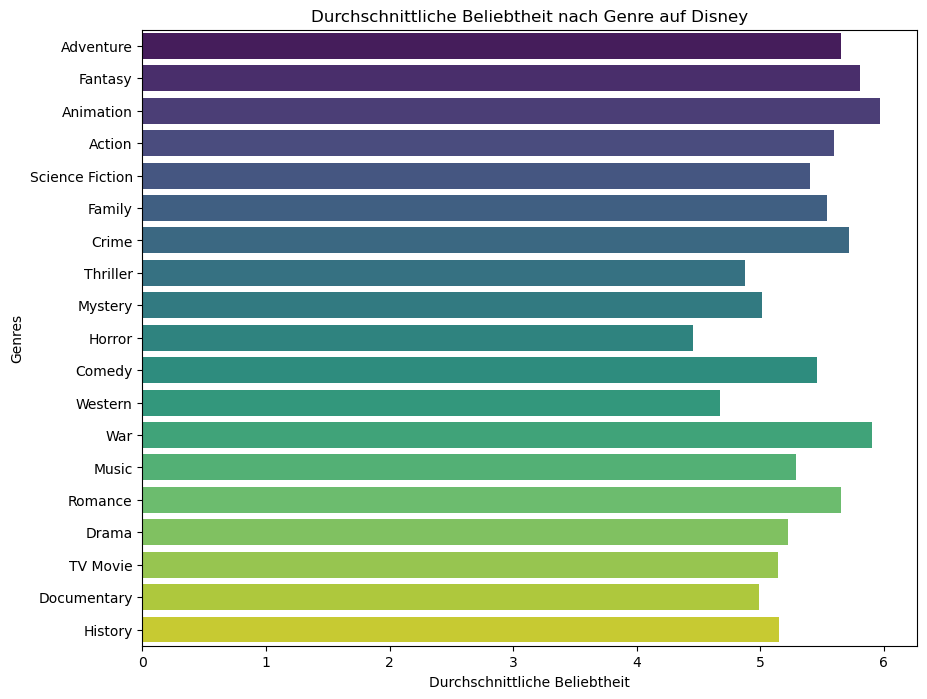

In [426]:
chart_genre(combined_dataframe_netflix,'Netflix')
chart_genre(combined_dataframe_amazon,'Amazon')
chart_genre(combined_dataframe_disney,'Disney')